In [1]:
import cv2
import matplotlib.pyplot as plt 

In [2]:
config_file = 'data/ssd_mobilenet_v3_large.pbtxt'
frozen_model = 'data/frozen_inference_graph.pb'
# "labels.txt"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name = 'data/labels.txt'
with open(file_name, 'rt') as fpt: 
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [5]:
# Add the labels inside the lists.

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
  print(len(classLabels))

80


In [7]:
# Setting the input values - Scale Size

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000276E6581A90>

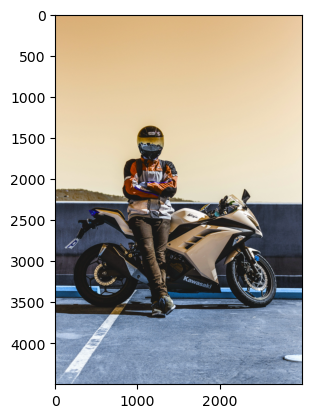

In [8]:
img = cv2.imread('data/boy-img.jpeg')
plt.imshow(img)

In [9]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [10]:
print(ClassIndex) # 1 = person, 2 = Bicycle, 3 = Car, 4=motor bike

[1 4 1]


In [16]:
font_scale = 12
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): 
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0, 255, 0), thickness=12)

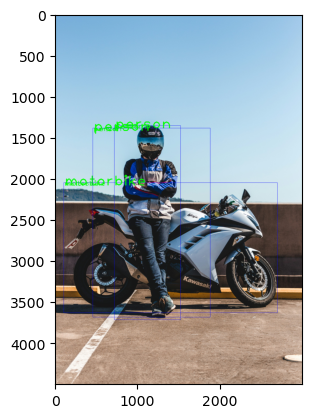

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
# Video part

In [20]:
import cv2

cap = cv2.VideoCapture('data/george-morina-pedestrians.mp4')
if not cap.isOpened(): 
    cap = cv2.VideoCapture(0)
if not cap.isOpened(): 
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True: 
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0: 
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], 
                            (x + 10, y + 40), 
                            font, font_scale, 
                            color=(0, 255, 0), 
                            thickness=3)

    cv2.imshow('This is Object Detection', frame)

    key = cv2.waitKey(2) & 0xFF
    if key == ord('a'): 
        break
    # Check if the 'q' key is pressed or the window is closed
    elif cv2.getWindowProperty('This is Object Detection', cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()
